In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline

In [51]:
import os

import h5py
import numpy as np
import matplotlib.pyplot as plt

from agnfinder.prospector import visualise, main

In [4]:
os.chdir('../')

In [5]:
!pwd

/home/mike/repos/agnfinder


## Load a galaxy (for obs) and define a model and sps (source)

In [6]:
galaxy_index = 1
galaxy = main.load_galaxy(galaxy_index)
redshift = galaxy['redshift']
agn_fraction = True

In [7]:
run_params, obs, model, sps = main.construct_problem(galaxy, redshift=redshift, agn_fraction=agn_fraction)

### Visualise the observation + model SED with random (initial) parameters

In [9]:
model.theta  # initial conditions

array([ 1.e+10, -5.e-01,  6.e-01,  1.e+00,  1.e+00,  1.e-01])

In [10]:
_ = model.sed(model.theta, obs=obs, sps=sps)  # trigger slow initial calculation of FSPS model

[1.0510500e+02 1.0857000e+02 1.1088000e+02 ... 1.1338635e+08 1.1443740e+08
 1.1550000e+08]
[1.14163387e-07 1.16175059e-07 1.17499747e-07 ... 1.03543147e-09
 1.00807784e-09 9.82020476e-10]


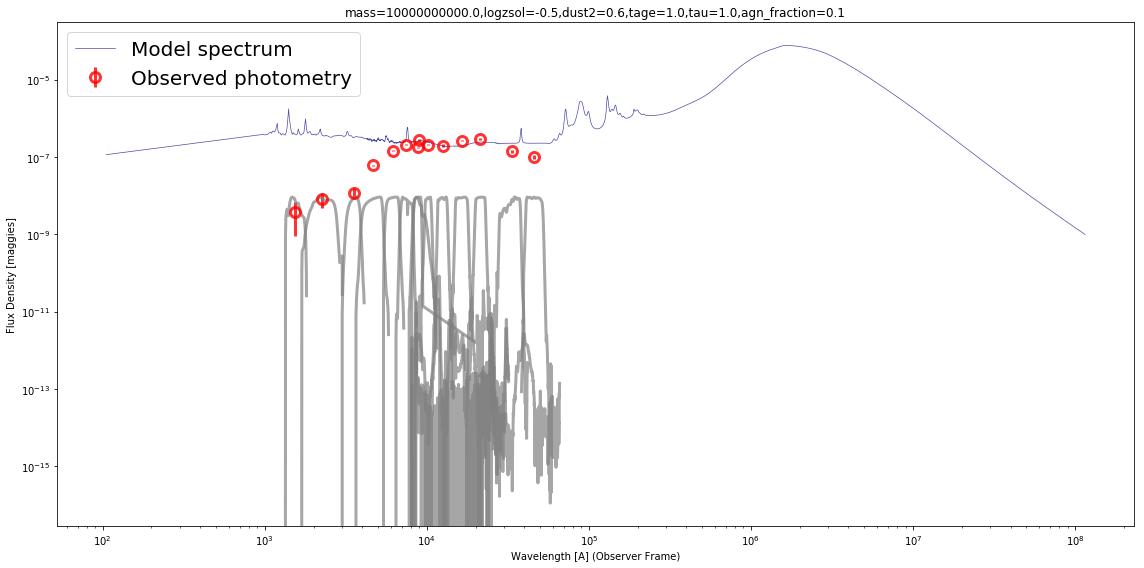

In [11]:
visualise.visualise_obs_and_model(obs, model, model.theta, sps)  # sometimes, the model SED is outside the automatic range (based on obs)

## Visualise Model SEDs of Samples

### Load previous samples

In [12]:
sample_dir = '/home/mike/repos/agnfinder/results/fixed_redshift_with_agn_dynesty_saved_samples'

In [13]:
assert os.path.isdir(sample_dir)

In [14]:
all_files = os.listdir(sample_dir)
h5py_files = [x for x in all_files if '.h5py' in x]
matching_h5py_files = [x for x in h5py_files if '_{}_'.format(galaxy_index) in x]
assert len(matching_h5py_files) == 1
sample_file = matching_h5py_files[0]

In [15]:
with h5py.File(os.path.join(sample_dir, sample_file), 'r') as f:
    samples = f['samples'][...]
assert len(samples.shape) == 2
assert samples.shape[0] > samples.shape[1]

In [16]:
model_dim = len(model.free_params)
sample_dim = len(samples[0])
if not model_dim == sample_dim:
    raise ValueError(
        'check model of with params {} ({}) matches the one used for samples ({}) - free redshift? free AGN?'.format(model.free_params, model_dim, sample_dim)
    )

In [75]:
n_samples = 1000
burn_in = 2000  # I notice the first few samples are awful - let's exclude the first 1000. Need to revew the algorithm details here!
sample_indices = np.random.choice(range(burn_in, len(samples)), size=n_samples, replace=False)  # pick random subset of samples to display - 4k is too many

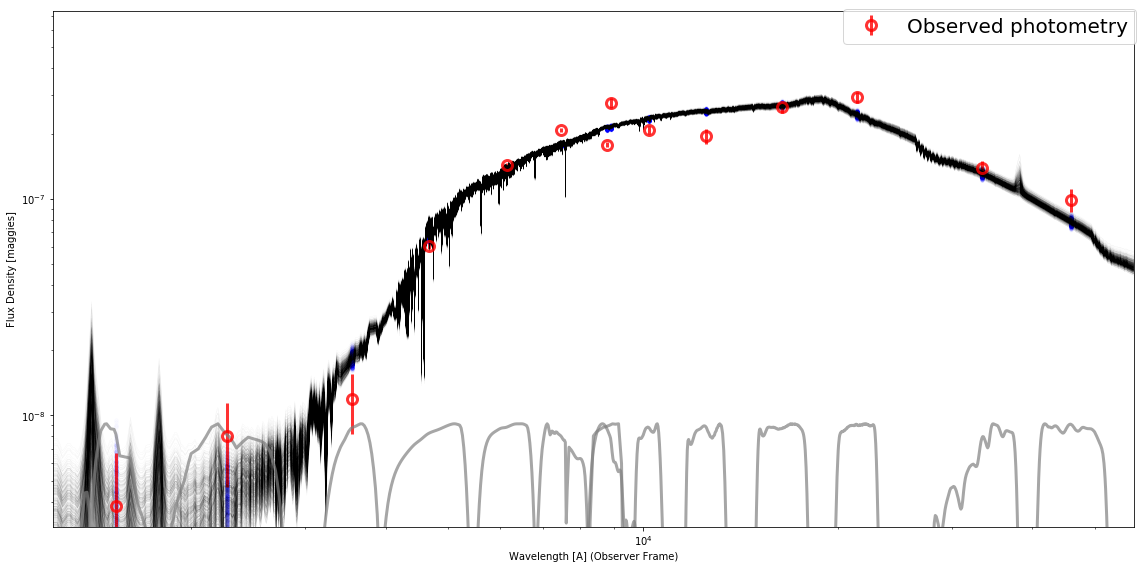

In [76]:
visualise.visualise_obs_and_models(obs, model, samples[sample_indices], sps)

In [64]:
import corner

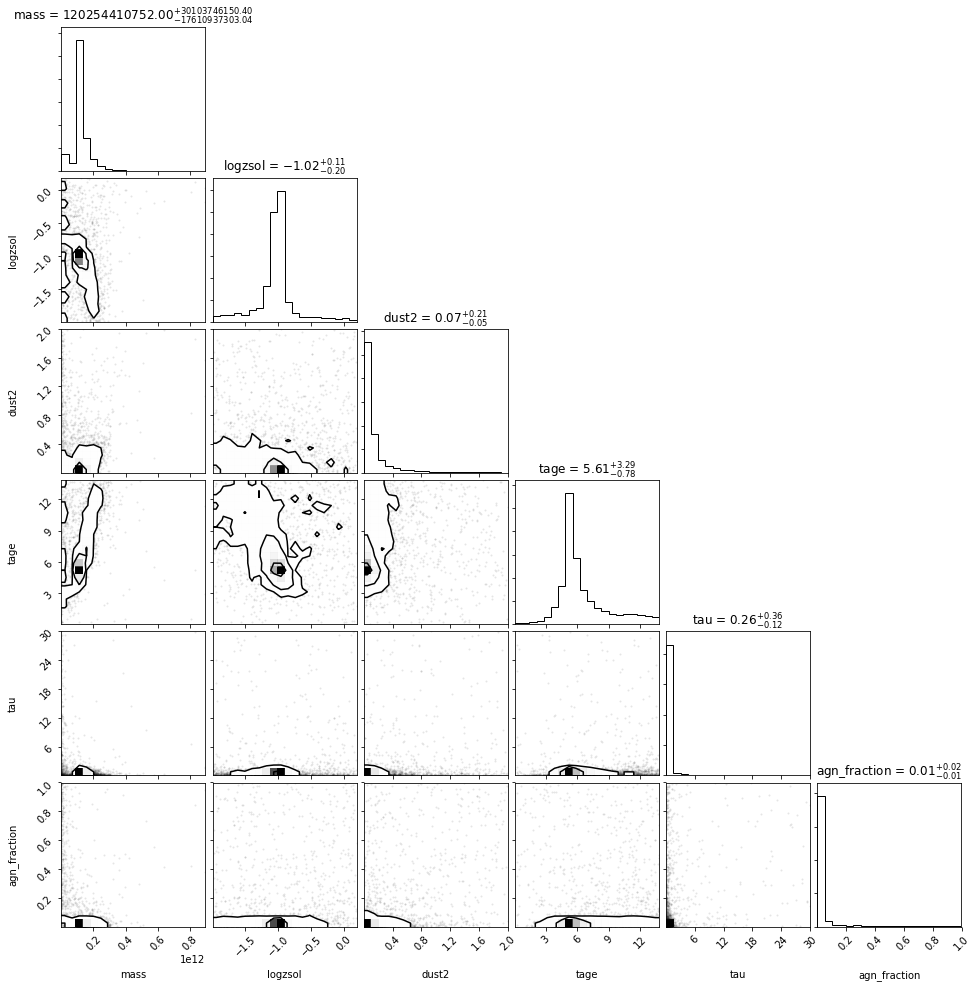

In [70]:
_ = corner.corner(samples, labels=model.free_params,
                        show_titles=True, title_kwargs={"fontsize": 12})

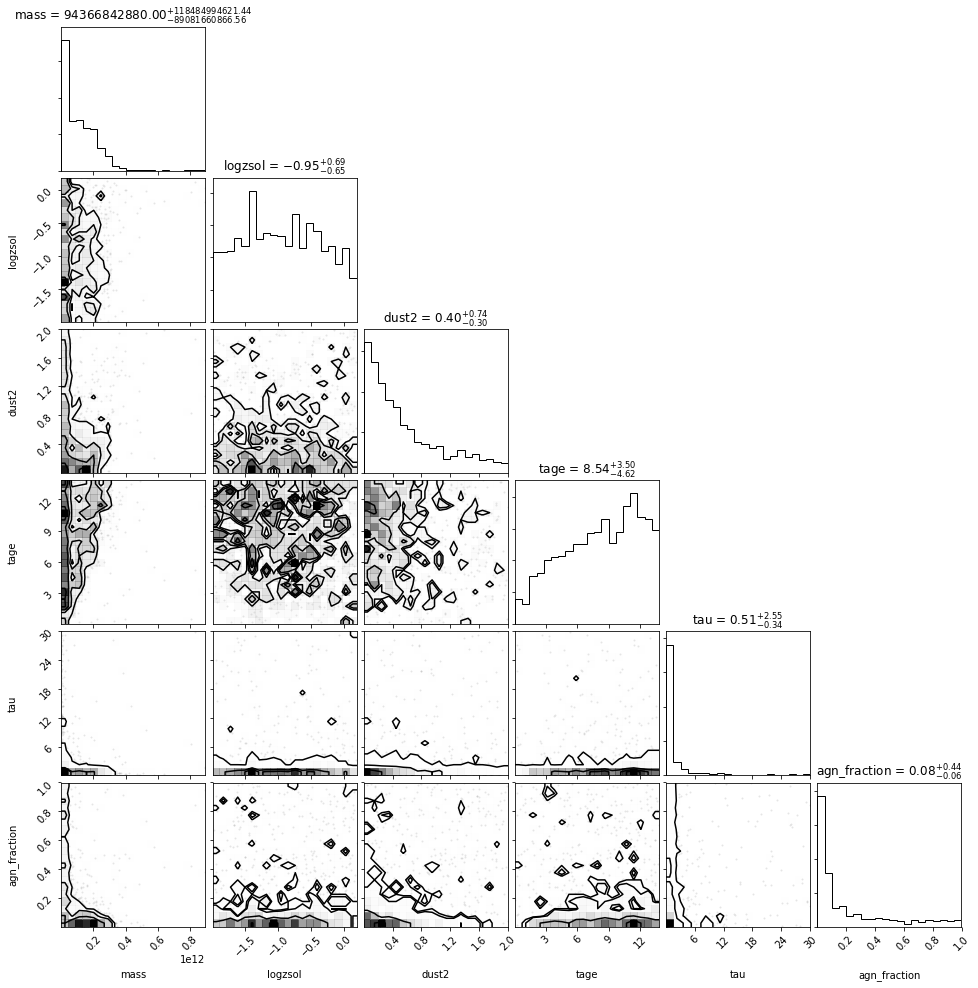

In [69]:
_ = corner.corner(samples[:1000], labels=model.free_params,
                        show_titles=True, title_kwargs={"fontsize": 12})

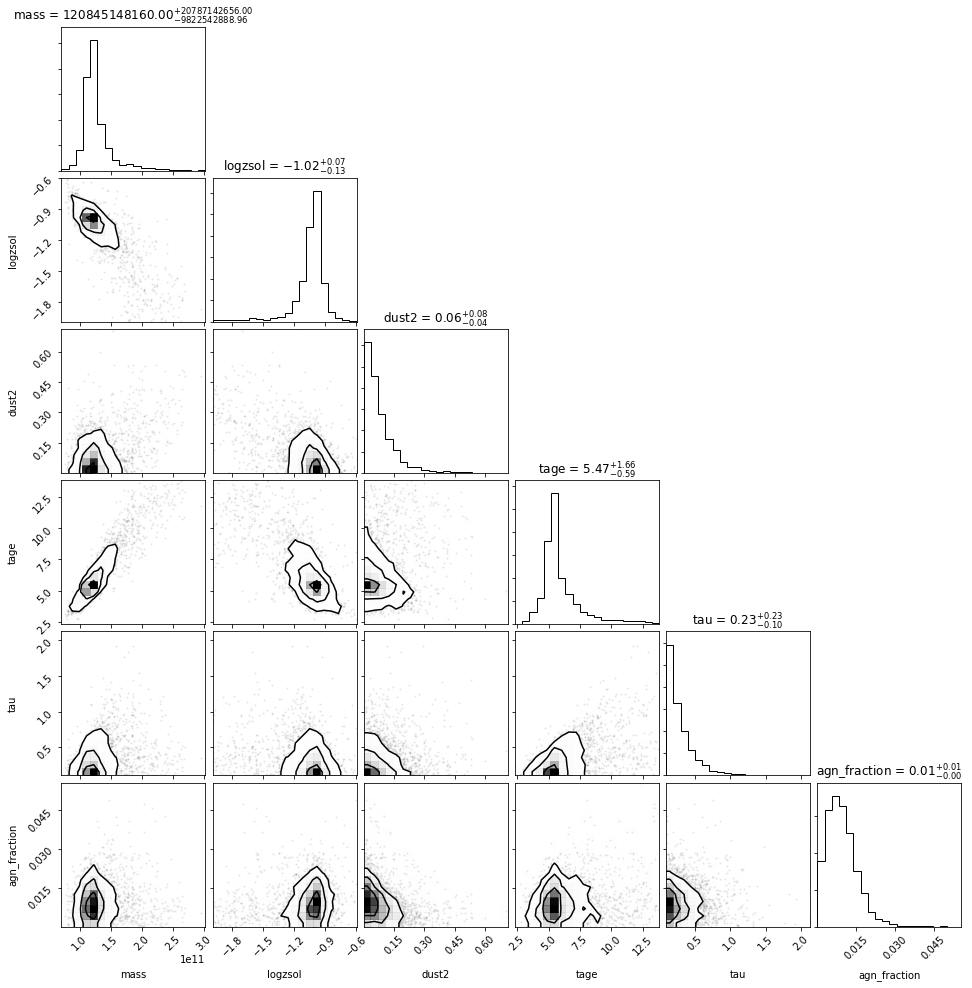

In [68]:
_ = corner.corner(samples[1000:], labels=model.free_params,
                        show_titles=True, title_kwargs={"fontsize": 12})

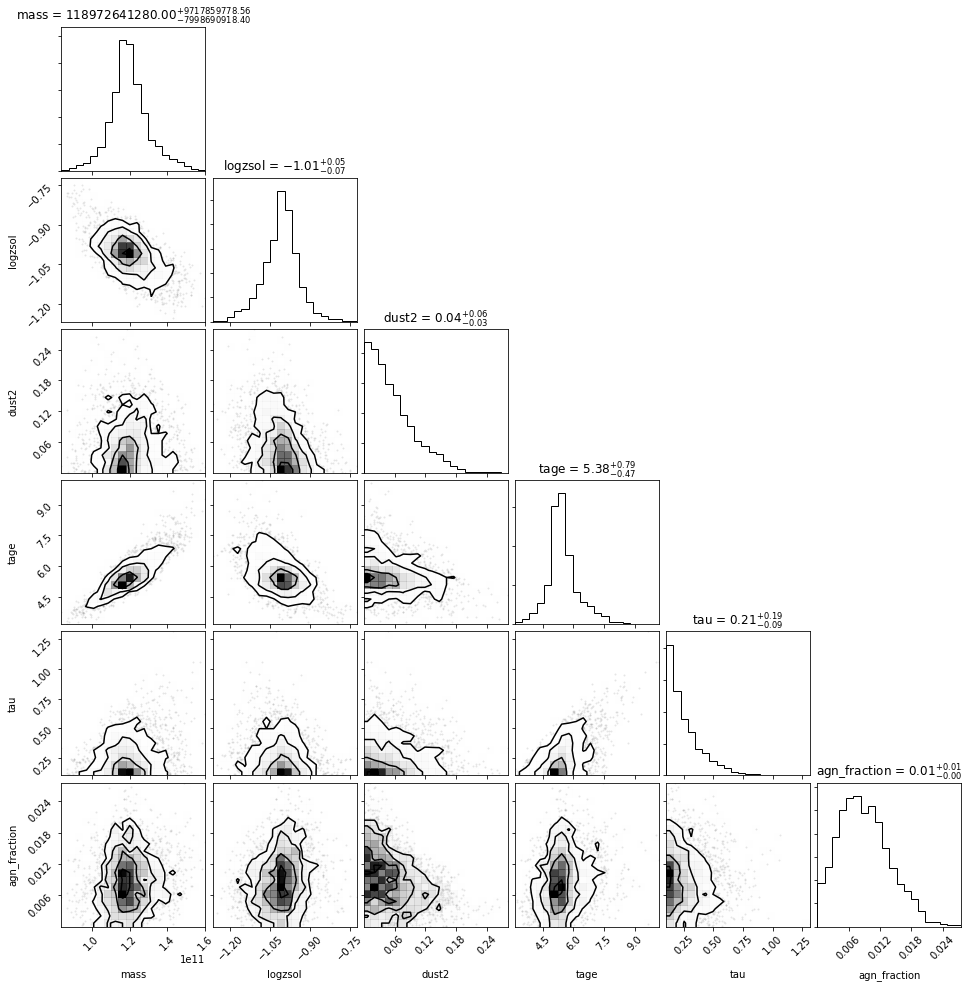

In [74]:
_ = corner.corner(samples[2000:], labels=model.free_params,
                        show_titles=True, title_kwargs={"fontsize": 12})